# Chapter 4 and 5 vs2


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as sts
#%matplotlib qt
#plt.close(fig='all')

%matplotlib inline



Multiple Choice Question:
The number of injuries per week in a particular factory is known to follow a Poisson distribution with mean 0.4. What is the probability that in a two working week period there will be no accidents? (Note injuries per week are idenpendent events)

Multiple Choice Question:
Each sample of water has 10% chance of containing high levels of organic solids. Determine the probability that in the next 18 samples at least 2 contain high levels of solids

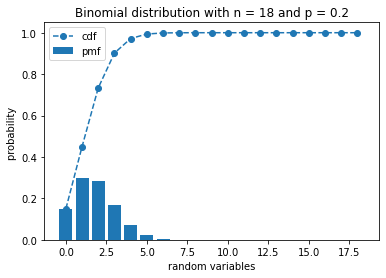

mean:  1.8
standard deviation:  1.2727922061357855
P(x < 2)  = 0.4502839058909973
P(x >= 2)  = 0.5497160941090027


In [8]:
# Binomial distribution
# Frozen random variable distribution
rv = sts.binom(18,0.1)
# ranging form 0->18
x = np.arange(0,19)
#print(x)
fig, ax = plt.subplots()
plt.bar(x,rv.pmf(x))

plt.plot(x,rv.cdf(x),'o--')
plt.title('Binomial distribution with n = 18 and p = 0.2')
plt.xlabel('random variables')
plt.ylabel('probability ')
plt.legend(('cdf','pmf'))
plt.show()
print('mean: ', rv.mean())
print('standard deviation: ', rv.std())

print('P(x < 2)  =',rv.cdf(1))
print('P(x >= 2)  =',1-rv.cdf(1))

Open Question:  
The weight of pralines (Neuhaus) is uniformly distributed between 16.54 grams and 23.46 grams. 50 pralines are packed in bags (the weight of the bags can be neglected).




Part 1: Calculate the probability that the weight of the filled bags is less than 981.9 grams.

Simulate data drawn for a uniform distribution: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform and https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.rvs.html

In [3]:
# Random Variable Distribution [loc loc+scale]
rv = sts.uniform(loc = 16.54, scale = (23.46-16.54))
# X is a 1000 x 50 matrix 
# each row is one sample
X = rv.rvs([1000,50])
# print first row
print(X[0,:])
# See formula chart for the mean and standard deviation
print('mean ',  (23.46+16.54)/2)
print('standard deviation', (23.46-16.54)/np.sqrt(12))
# Now use the mean and std of the froozen random variable
print('mean ',  rv.mean())
print('standard deviation', rv.std())

[16.56574722 22.73087143 18.70296126 20.20610917 20.02533626 21.86969579
 19.59365538 22.28973786 22.34615403 21.74917488 21.25071948 17.77628488
 20.01951556 22.06233207 18.80932252 22.75138449 16.6573256  18.2840724
 21.84165257 19.6976628  17.11990869 19.72278539 17.17247498 17.03859178
 21.14619897 18.11598289 22.87775117 20.84235613 19.49607558 17.91140953
 17.8454248  19.95961225 16.67725588 18.78293753 19.20784319 17.37872269
 17.06575381 20.72499919 18.89062534 19.83927146 18.60259685 23.03732917
 19.16248478 22.37526896 21.46456097 16.92940282 19.53814909 21.52154224
 20.5929649  21.01601571]
mean  20.0
standard deviation 1.9976319313961057
mean  20.0
standard deviation 1.9976319313961057


https://numpy.org/doc/stable/reference/generated/numpy.sum.html

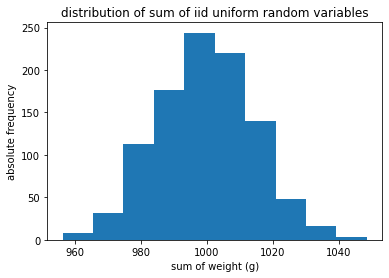

In [4]:
# Plot the histogram of the sampling distribution
# Note that it is mount shaped symmetrical
fig, ax = plt.subplots()
xt = np.sum(X,axis = 1)
plt.hist(xt,10)
plt.title('distribution of sum of iid uniform random variables')
plt.xlabel('sum of weight (g)')
plt.ylabel('absolute frequency')
plt.show()

$x_i \sim U(\mu = 20, \sigma \approx 2)$

$x_t = x_1+ \cdots + x_{50}$

$E(x_t) = E(x_1)+ \cdots + E(x_{50}) = 50.20 =1000 $

$var(x_t) = var(x_1)+ \cdots + var(x_{50})  = 50.4 = 200$

Due to the central limit theorem $x_t \sim N(\mu = 1000, \sigma = \sqrt{200})$

In [5]:
# Frozen random variable distribution
mu_t = 1000
sig_t = np.sqrt(200)
rv =  sts.norm(loc = mu_t,scale = sig_t )
print('P(x_t < 981.9)  =',rv.cdf(981.9))

P(x_t < 981.9)  = 0.10029661298331827


Part 2: 10 bags are packed in a box. Calculate the probability that a box contains 2 or more bags weighing less than 981.9 grams.


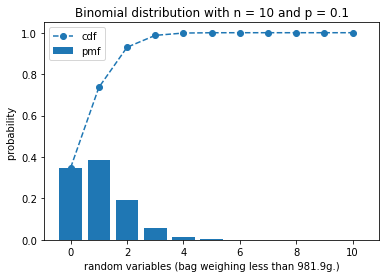

P(x>=2) =  0.26390107090000003


In [6]:
# Binomial distribution
# Frozen random variable distribution
rv = sts.binom(10,0.1)
# ranging form 0->10
x = np.arange(0,11)
# print(x)
fig, ax = plt.subplots()
plt.bar(x,rv.pmf(x))
plt.plot(x,rv.cdf(x),'o--')
plt.title('Binomial distribution with n = 10 and p = 0.1')
plt.xlabel('random variables (bag weighing less than 981.9g.)')
plt.ylabel('probability ')
plt.legend(('cdf','pmf'))
plt.show()

print('P(x>=2) = ',1-rv.cdf(1))